# multivariate gaussian case

considering bivariate because it will be quciker implement a heatmap for the pdf

![image](images\multivariate_gaussian_euqation.png)

In [14]:
# very important note - best practice is now the %pip install not !pip install bc % ensures it downloads into the venv ! just install it somewhere i guess
%pip install numpy
%pip install matplotlib

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/4c/79/73735a6a5dad6059c085f240a4e74c9270feccd2bc66e4d31b5ca01d329c/numpy-2.1.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     -------------------------------- ----- 51.2/59.7 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 526.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 16.5 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/12.6 MB 24.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.8/12.6 MB 30.0 MB/s eta 0:00:01
   ------------------- -------------------- 6.0/12.6 MB 35.0 MB/s eta 0:00:01
   ---------------------------- ----------- 9.0/12.6 MB 41.1 MB/s eta 0:00:01
   ----------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d2/92/c2b9464a0562feb6ae780bdc152364810862e07ef5e6affa2b7686028db2/matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/0c/89/9830ba00d88e43d15e53d64931e66b8792b46eb25e2050a88fec4a0df3d5/contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/b9/0a/a57caaff3bc880779317cb157e5b49dc47fad54effe027016abd355b0651/fonttools-4.54.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     ------- ------------------------------- 30.7/167.0 kB 1.3 MB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [71]:
def generate_X_2d(start =-1, stop=1, step=0.1, with_targets = True):
    # returns a 2d mesh + an empty spot in each row or a random val
    X = []
    X1 = np.arange(start,stop+step,step)
    if not with_targets:
        for x1 in X1:
            for x2 in X1:
                X+=[x1,x2]
        X = np.array(X).reshape(-1,2)
        return X
    for x1 in X1:
        for x2 in X1:
            X+=[x1,x2, (random.randrange(0,10,1))/10]
    X = np.array(X).reshape(-1,3)
    return X

In [47]:
X = generate_X_2d()
print(X)
#print(X[:,2])
print(X[:,2].reshape(21,21)) # this gives the random targets generated in the function


[[-1.  -1.   0.1]
 [-1.  -0.9  0.1]
 [-1.  -0.8  0.9]
 ...
 [ 1.   0.8  0.9]
 [ 1.   0.9  0.9]
 [ 1.   1.   0.1]]
[[0.1 0.1 0.9 0.3 0.6 0.4 0.9 0.4 0.3 0.8 0.6 0.  0.7 0.  0.7 0.9 0.5 0.2
  0.4 0.2 0.9]
 [0.1 0.8 0.7 0.9 0.2 0.2 0.7 0.2 0.1 0.4 0.  0.4 0.5 0.1 0.8 0.2 0.9 0.9
  0.3 0.  0.3]
 [0.6 0.3 0.3 0.4 0.6 0.8 0.5 0.8 0.7 0.5 0.3 0.5 0.3 0.1 0.2 0.3 0.4 0.8
  0.8 0.5 0.8]
 [0.9 0.7 0.3 0.  0.6 0.2 0.7 0.3 0.8 0.9 0.9 0.8 0.6 0.8 0.2 0.5 0.  0.8
  0.1 0.  0.1]
 [0.5 0.  0.7 0.4 0.8 0.4 0.3 0.1 0.7 0.7 0.4 0.1 0.7 0.5 0.8 0.9 0.4 0.6
  0.6 0.9 0.1]
 [0.7 0.8 0.5 0.  0.4 0.7 0.6 0.1 0.3 0.4 0.4 0.9 0.2 0.8 0.8 0.1 0.3 0.3
  0.9 0.3 0.3]
 [0.7 0.1 0.8 0.  0.7 0.8 0.1 0.6 0.2 0.6 0.2 0.1 0.8 0.8 0.6 0.8 0.6 0.4
  0.  0.5 0.8]
 [0.6 0.1 0.7 0.9 0.1 0.8 0.3 0.4 0.2 0.  0.5 0.7 0.4 0.4 0.5 0.7 0.6 0.
  0.5 0.7 0.2]
 [0.8 0.4 0.2 0.5 0.7 0.7 0.7 0.4 0.3 0.  0.4 0.5 0.4 0.9 0.7 0.3 0.4 0.8
  0.4 0.6 0.2]
 [0.5 0.2 0.9 0.2 0.7 0.9 0.2 0.6 0.8 0.9 0.8 0.9 0.4 0.9 0.3 0.7 0.4 0.6
  0.5 0.9 0.

below allows for the plotting of the targets, problem is it doens;t take the x1 or x2 values, it would be better if it did but ok for now

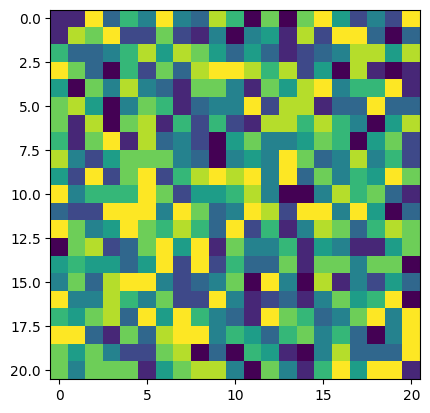

In [48]:
plt.imshow(X[:,2].reshape(21,21))



ok so going back to this equation:
![image](images\multivariate_gaussian_euqation.png)

In [78]:
X = generate_X_2d(with_targets=False)
#print(X)
pi = 3.1415 # might want this more accurate
covar = [[1, 0.5],[0.5,1]] # choosing a small correlation
M = [1,2] # choosing two means sort of randomly
n = 2 # we are dealing with 2d
det_covar = np.linalg.det(covar)
inverse_covar = np.linalg.inv(covar)

e = 2.7182818
print(det_covar)

## ok so the first part of the function is a constant lets call it k
## finding k:
k = (((2*pi)**(n/2))*((det_covar)**(1/2)))**-1

x1 = X[0,0]
x2 = X[0,1]
x = [x1,x2]
x_minus_M = print(np.subtract(x,M))
print(x_minus_M)


0.75
[-2. -3.]
None


In [ ]:

print(k)
for x1,x2 in X:
    
    prob_dist += k*(e**(-0.5([])))
    break
    